# KNN Customer Segmentation - Mall Dataset

In [1]:
pip install autoviz -q

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Mall - Kaggle Dataset/Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
 df.info()
print("\n\n\n NO missing values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB



 NO missing values


In [5]:
#Gender is an object. lets convert it into categorical feature using pd.dummies(one hot encode)

#The advantages of using one hot encoding include:
#It allows the use of categorical variables in models that require numerical input.
#It can improve model performance by providing more information to the model about the categorical variable.

df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)

In [6]:
#one hot encodig successfull as we can see in the dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    uint8
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), uint8(1)
memory usage: 6.6 KB


In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Insights from the Data

#1.  There is no strong coorelation between any columns ( using heatmap and pairplot).

#2. As age of both gender increases their spending habit decreases.
             
#3. female      mean Age 38.098214   mean Annual Income (k$)59.250000     mean Spending Score 51.526786
#4. male        mean Age 39.806818   mean Annual Income (k$)62.227273     mean Spending Score 48.511364

#5. max income of female is 126k and min is 16k
#6. max income of male is 137k and min is 15k 

#7. highest spending score is of a female (99 out of 100)

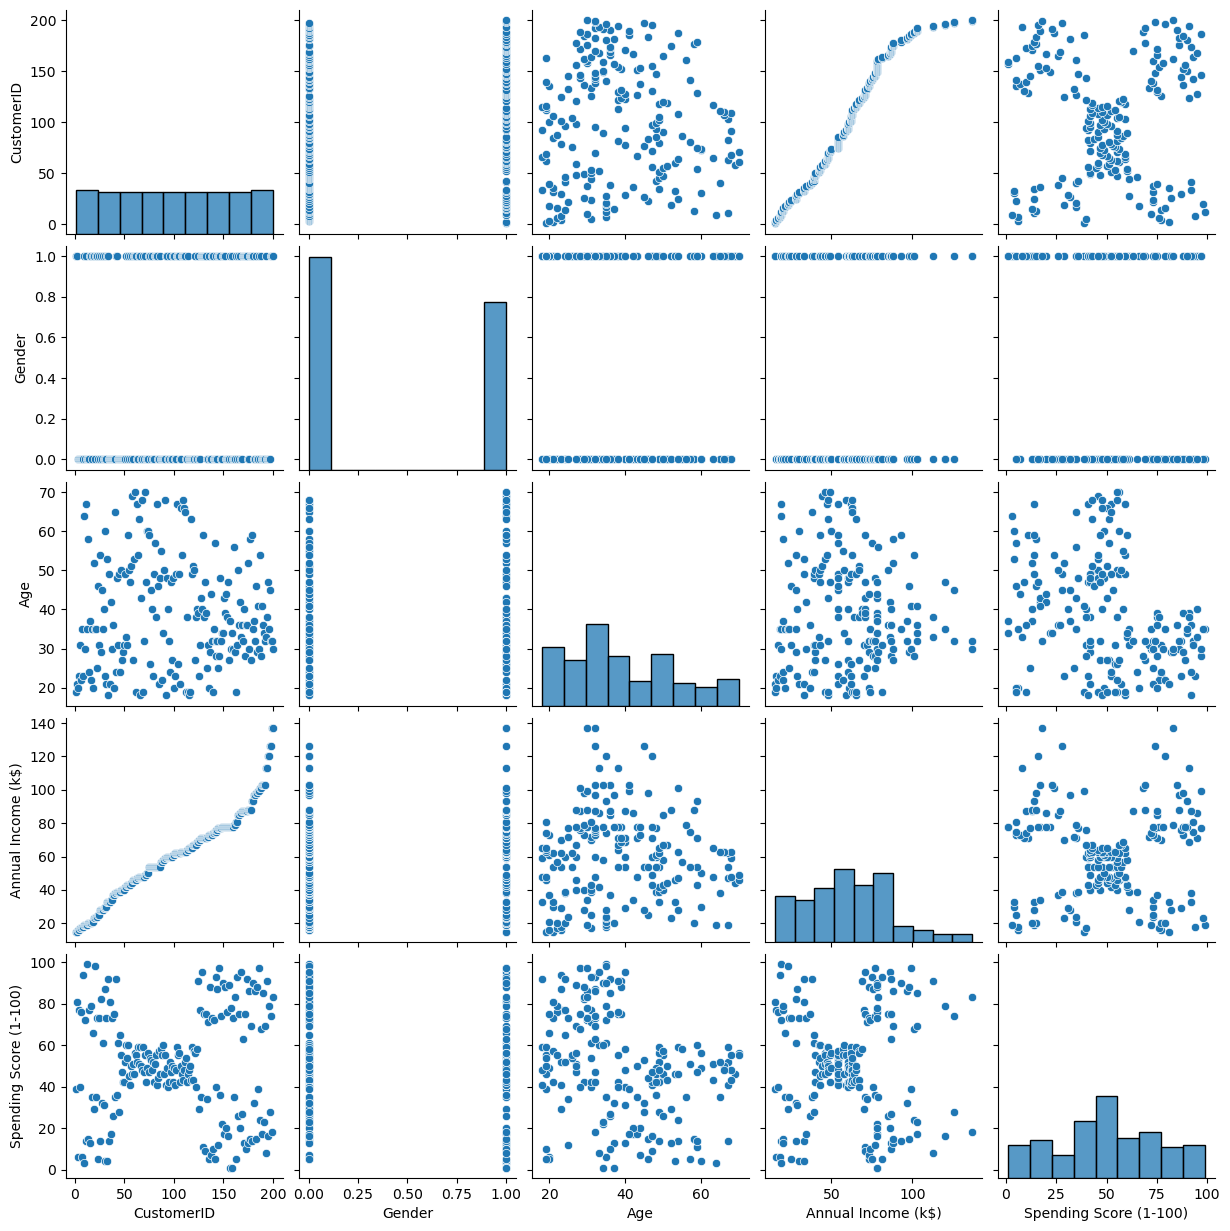

In [8]:
#lets see the plots between different columns of the dataset
sns.pairplot(df)

<AxesSubplot:>

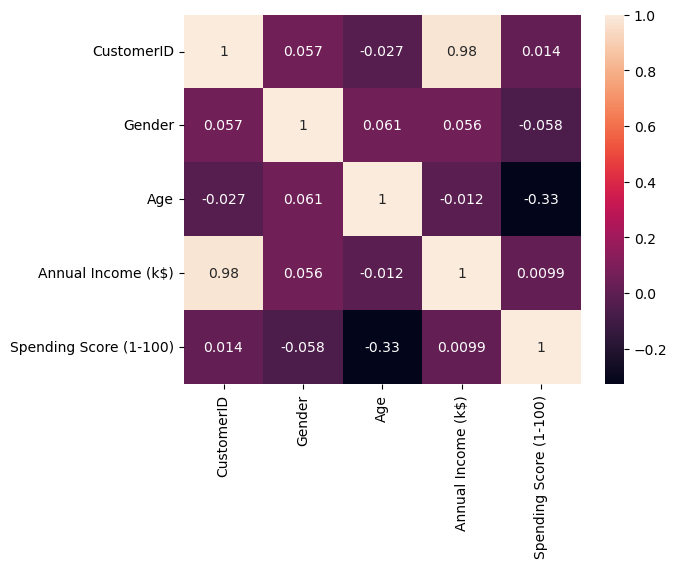

In [10]:
sns.heatmap(df.corr(),annot=True)

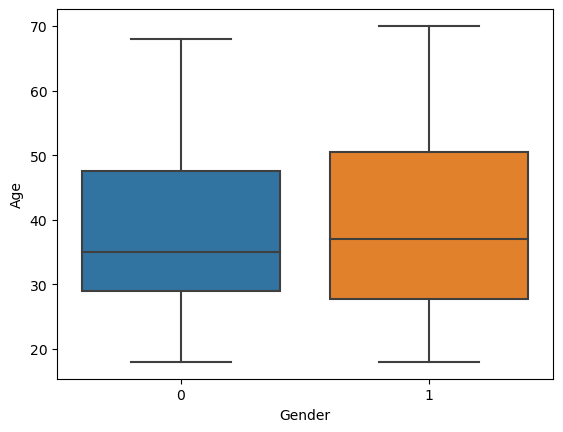

In [11]:
#outliers  0 = Female , 1= Male
sns.boxplot(x='Gender',y='Age',data=df);

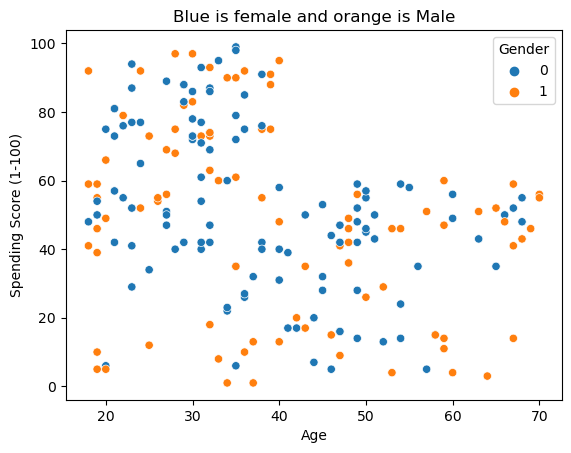

In [12]:
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)',hue='Gender')
plt.title("Blue is female and orange is Male")
plt.show()

In [13]:
Gen =df.groupby('Gender')

In [14]:
print("\t\t\t0 is female and 1 is male")
Gen.mean()

			0 is female and 1 is male


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
0,97.562500,38.098214,59.250000,51.526786
1,104.238636,39.806818,62.227273,48.511364


In [15]:
#max and min 
print(Gen.max())
print('\n\n')
print(Gen.min())

        CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                             
0              197   68                 126                      99
1              200   70                 137                      97



        CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                             
0                3   18                  16                       5
1                1   18                  15                       1


# KNN Algorithm

In [16]:
X= df.iloc[:, [3,4]].values

In [17]:
from sklearn.cluster import KMeans

In [18]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

C:\Users\Micheal Jacob\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Micheal Jacob\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Micheal Jacob\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Micheal Jacob\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on 

In [19]:
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)

C:\Users\Micheal Jacob\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Micheal Jacob\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


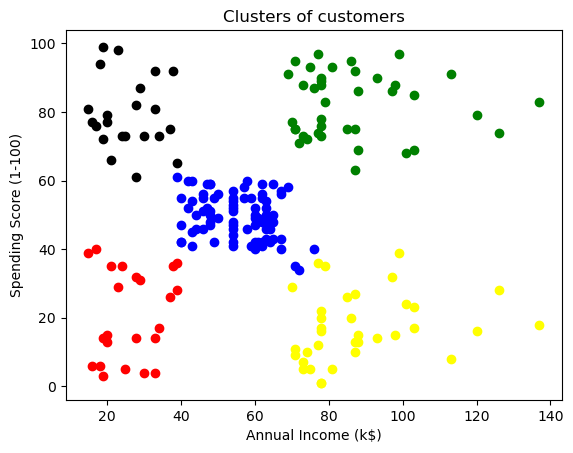

In [20]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],color='black')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [21]:
model=KMeans(n_clusters=5)
model.fit(df)
pre=model.predict(df)

C:\Users\Micheal Jacob\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Micheal Jacob\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
df["Target"]=y_means

In [23]:
df=df
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,1,19,15,39,1
1,2,1,21,15,81,4
2,3,0,20,16,6,1
3,4,0,23,16,77,4
4,5,0,31,17,40,1


In [24]:
X=df.iloc[:,1:5]
y=df.iloc[:,-1]

In [25]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [26]:
y.head()

0    1
1    4
2    1
3    4
4    1
Name: Target, dtype: int32

In [27]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
#Standardize the varriables
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()

In [29]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
error_rate=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

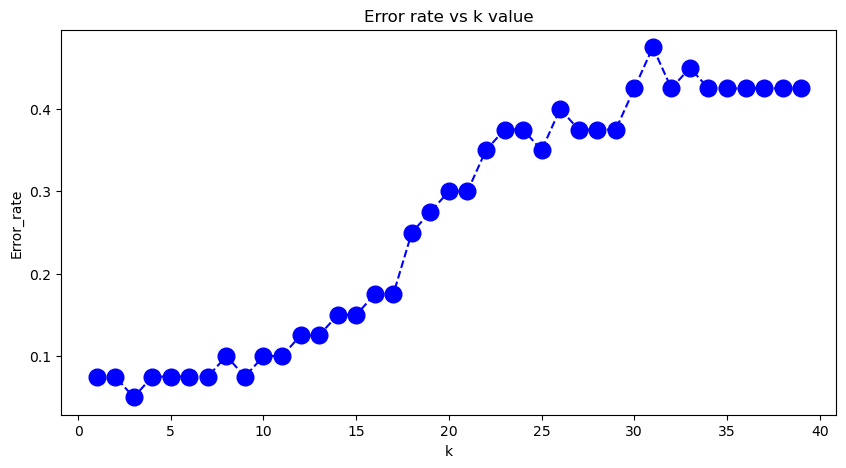

In [32]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markersize=12)
plt.title("Error rate vs k value")
plt.xlabel("k")
plt.ylabel("Error_rate")
plt.show()

In [33]:
knn =KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred_5=knn.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred_5)
accuracy

0.925